# Цель занятия
На этом занятии мы рассмотрим особенности модели решающего дерева.

**Решающее дерево** - это алгоритм машинного обучения, который используется для решения задач классификации и регрессии. Оно представляет собой древовидную структуру, где каждый узел представляет тест на одном из признаков, а каждая ветвь - возможный результат этого теста. Листья дерева представляют собой конечный результат - прогноз для новых данных.

В процессе построения решающего дерева, алгоритм выбирает тест, который лучше всего разделяет данные на различные классы или предсказывает значение целевой переменной. Затем данные разбиваются на две или более частей в соответствии с результатами теста. Этот процесс повторяется для каждой полученной части, пока не будет достигнут критерий останова.


## Реализация энтропии

Энтропийный критерий используется в машинном обучении для измерения неопределенности в наборе данных. Он основан на понятии энтропии из информационной теории.

Энтропия является мерой неопределенности. Чем выше энтропия, тем более неопределенным является набор данных. Для бинарной классификации, когда у нас есть два класса, энтропия может быть выражена следующей формулой:

$$H(p) = -p_1 \log_2(p_1) -p_2 \log_2(p_2)$$

где $p_1$ и $p_2$ - вероятности первого и второго классов соответственно.

Чтобы применить энтропийный критерий к дереву решений, мы вычисляем энтропию для каждого разбиения на признаке и выбираем разбиение с наименьшей энтропией. Чем меньше энтропия, тем более "чистым" является разбиение, то есть чем меньше неопределенности в подмножествах данных, полученных после разбиения.

Для реализации энтропийного критерия в Python для вектора признаков, нам нужно вычислить энтропию для каждого разбиения и выбрать разбиение с наименьшей энтропией:

In [1]:
import numpy as np

def entropy(y):
    """
    Вычисляет энтропию вектора y со значениями дискретных переменных.

    Аргументы:
    - y: вектор numpy с дискретными значениями.

    Возвращает:
    - entropy: значение энтропии типа float.
    """
    # Подсчитываем количество каждого уникального значения в y.
    _, counts = np.unique(y, return_counts=True)
    # Вычисляем вероятность каждого уникального значения.
    probs = counts / len(y)
    # Вычисляем значение энтропии.
    return -np.sum(probs * np.log2(probs))

def find_best_split_entropy(X, y):
    """
    Находит лучшее разбиение для вектора признаков X и вектора целевой переменной y, используя критерий энтропии.

    Аргументы:
    - X: вектор numpy с вещественными значениями признаков.
    - y: вектор numpy с дискретными значениями целевой переменной.

    Возвращает:
    - best_feature: индекс признака, по которому было найдено лучшее разбиение.
    - best_threshold: значение порога, по которому было найдено лучшее разбиение.
    - best_gain: значение критерия энтропии для лучшего разбиения.
    """
    best_feature, best_threshold, best_gain = None, None, 0
    # Итерируемся по всем признакам.
    for feature in range(X.shape[1]):
        # Находим уникальные значения признака.
        thresholds = np.unique(X[:, feature])
        # Итерируемся по всем возможным пороговым значениям признака.
        for threshold in thresholds:
            # Определяем индексы объектов, которые относятся к левому поддереву и правому поддереву.
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold
            # Пропускаем текущую итерацию, если не найдены объекты, которые относятся к левому или правому поддереву.
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            # Определяем вектор целевой переменной для объектов, которые относятся к левому и правому поддереву.
            left_y, right_y = y[left_indices], y[right_indices]
            # Вычисляем значение критерия энтропии для текущего разбиения.
            gain = entropy(y) - (len(left_y) / len(y)) * entropy(left_y) - (len(right_y) / len(y)) * entropy(right_y)
            # Обновляем значения лучшего разбиения, если найдено разбиение с большим значением
            if gain > best_gain:
                best_feature, best_threshold, best_gain = feature, threshold, gain
    return best_feature, best_threshold, best_gain


In [2]:
X = np.array([[2, 4], [2, 6], [2, 8], [4, 10], [6, 10], [8, 8], [8, 6], [8, 4], 
     [6, 6], [6, 4], [10, 2], [6, 8], [7.683182774875691, 2.0378865840698976], [12, 4], [12, 6], [12, 8]])
y = np.array(np.array([0]*8 + [1]*8))
best_feature, best_threshold, best_gain = find_best_split_entropy(X, y)
print("Best feature:", best_feature)
print("Best threshold:", best_threshold)
print("Best gain:", best_gain)

Best feature: 0
Best threshold: 4.0
Best gain: 0.31127812445913283


![Изображение](images05/dividing_plane.png "Название изображения")

## Сравнение решающего дерева и линейной модели

- Линейные модели могут работать лучше на линейно разделимых данных

- При сложных нелинейных зависимостях решающее дерево может работать лучше

In [4]:
"""
Импорт необходимых библиотек:

"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

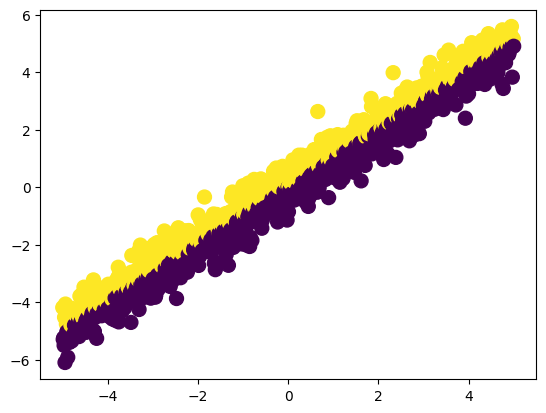

In [5]:
"""
Генерация искусственного набора данных:
"""
seed = 1
np.random.seed(seed)
n = 1000
data = np.zeros(shape=(n, 2))
data[:, 0] = np.linspace(-5, 5, n)
data[:, 1] = data[:, 0] + 0.5 * np.random.normal(size=n)
target = (data[:, 1] > data[:, 0]).astype(int)
plt.scatter(data[:, 0], data[:, 1], s=100, c=target)
plt.show()

In [6]:
"""
Разделение набора данных на обучающую и тестовую выборки:

"""

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=seed)

In [7]:
"""
Создание объекта линейного классификатора и обучение его на обучающей выборке:
"""
linear_classifier = LogisticRegression(random_state=seed)
linear_classifier.fit(X_train, y_train)

"""
Получение прогнозов на тестовой выборке и оценка точности классификатора:
"""
y_pred_linear = linear_classifier.predict(X_test)
print('f1_score_linear:', f1_score(y_test, y_pred_linear))

f1_score_linear: 1.0


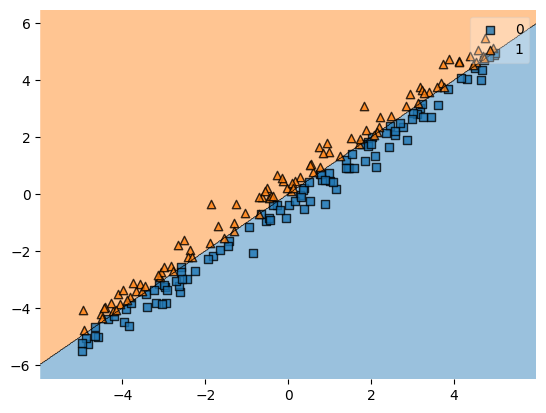

In [8]:
"""
Визуализация разделяющей поверхности линейного классификатора
"""
plot_decision_regions(X_test, y_test, linear_classifier)
plt.show()

In [9]:
"""
Создание объекта дерева и обучение его на обучающей выборке:
"""
tree_classifier = DecisionTreeClassifier(random_state=seed)
tree_classifier.fit(X_train, y_train)

"""
Получение прогнозов на тестовой выборке и оценка точности дерева:
"""
y_pred_tree = tree_classifier.predict(X_test)
print('f1_score_tree:', f1_score(y_test, y_pred_tree))

f1_score_tree: 0.8820512820512821


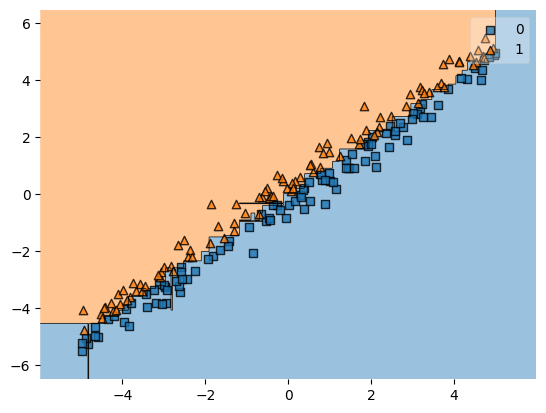

In [10]:
"""
Визуализация разделяющей поверхности дерева
"""
plot_decision_regions(X_test, y_test, tree_classifier)
plt.show()

Мы видим, что деревья решений могут работать хуже на линейно разделимых выборках